# Heat Maps

A heat map is a 2-d version of the histogram that can be used as an alternative to a scatterplot.

Like a scatterplot, the values of the two numeric variables to be plotted are placed on the plot axes.\
Similar to a histogram, the plotting area is divided into a **grid** and the number of points in each grid rectangle is added up.

Since there won't be room for bar heights, counts are indicated instead by **grid cell color**.

A heat map can be implemented with Matplotlib's `hist2d()` function.

**Heat maps are useful in the following cases:**
* To represent a plot for discrete vs. another discrete variable.
* As an alternative to transparency when the data points are enormous.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [4]:
fuel_econ = pd.read_csv('Files/fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


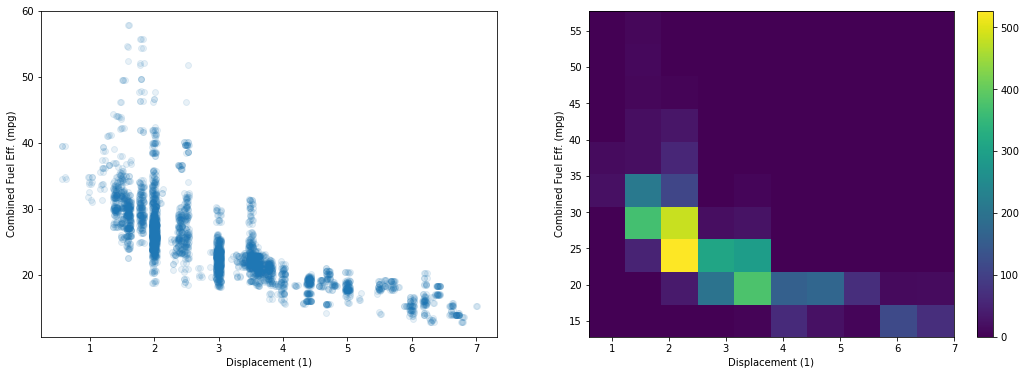

In [5]:
plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

**Note:** as `regplot()` the function `hist2d()` takes three arguments, the data, the x-axis variable and the y-axis variable.\
**Note:** `plt.colorbar()` function is to show the color bar beside the heat map graph.

## Additional Variations

**cmap**: To select a different color palette, you can set the `cmap` parameter in hist2d.

**cmap - Explanation:**\
The most convenient way of doing this is to set the `cmap` value as a string referencing a built-in Matplotlib palette.\
* A list of valid strings can be found on this part of the Pyplot API documentation.

A further discussion of color in plots will be left to the next lesson.\
For now, I will just show an example of reversing the default "viridis" color palette, by setting `cmap = 'viridis_r'`.

 ---
**cmin**: To distinguish cells with zero counts from those with non-zero counts we use the `cmin` parameter.

**cmin - Explanation:**\
This parameter specifies the minimum value in a cell before it will be plotted.\
* By adding a `cmin = 1` parameter to the hist2d call, this means that a cell will only get colored if it contains at least one point.

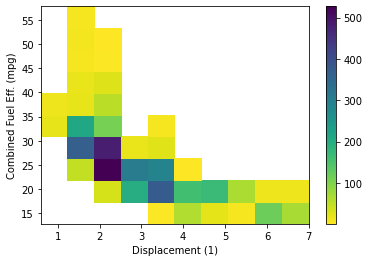

In [8]:
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=1, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

As the count of points in the cell increases, the color in the heatmap gets brighter and moves from blue to yellow.

# Heat plot - Specify bin edges

In [39]:
displ_char = fuel_econ['displ'].describe()
displ_char

count    3929.000000
mean        2.950573
std         1.305901
min         0.600000
25%         2.000000
50%         2.500000
75%         3.600000
max         7.000000
Name: displ, dtype: float64

In [38]:
comb_char = fuel_econ['comb'].describe()
comb_char

count    3929.000000
mean       24.791339
std         6.003246
min        12.821700
25%        20.658100
50%        24.000000
75%        28.227100
max        57.782400
Name: comb, dtype: float64

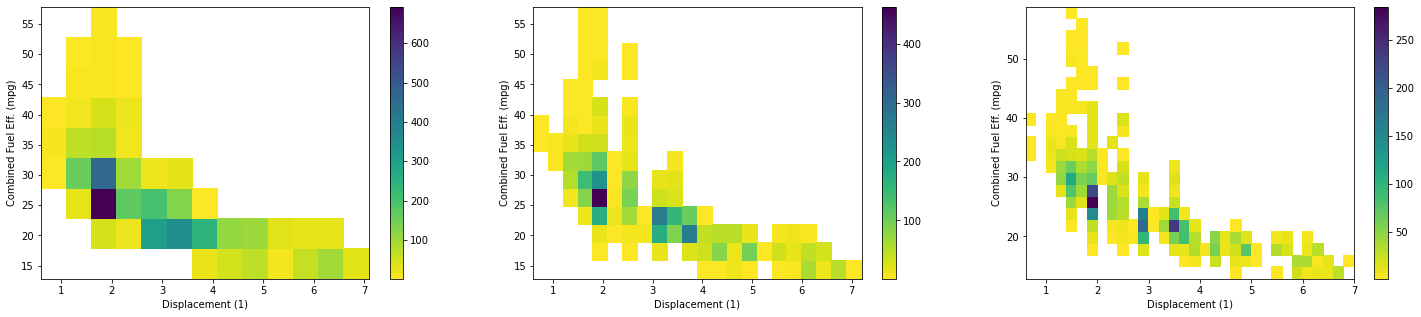

In [46]:
plt.figure(figsize = [25, 5])

# PLOT ON LEFT
x_bins = np.arange(displ_char['min'], displ_char['max'] + 0.5, 0.5)
y_bins = np.arange(comb_char['min'], comb_char['max'] + 5, 5)

plt.subplot(1, 3, 1)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [x_bins, y_bins])
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# PLOT ON MIDDLE
x_bins = np.arange(displ_char['min'], displ_char['max'] + 0.3, 0.3)
y_bins = np.arange(comb_char['min'], comb_char['max'] + 3, 3)

plt.subplot(1, 3, 2)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [x_bins, y_bins])
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# PLOT ON RIGHT
x_bins = np.arange(displ_char['min'], displ_char['max'] + 0.2, 0.2)
y_bins = np.arange(comb_char['min'], comb_char['max'] + 2, 2)

plt.subplot(1, 3, 3)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [x_bins, y_bins])
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

Notice the areas of high frequency in the middle of the negative trend in the plot.

Notice that since we have two variables, the "bins" parameter takes a list of two bin edge specifications, one for each dimension.\
Choosing an appropriate bin size is just as important here as it was for the univariate histogram.

# Annotations on each cell

If you have a lot of data, you might want to add annotations to cells in the plot indicating the count of points in each cell.

From hist2d, this requires the addition of text elements one by one, much like how text annotations were added one by one to the bar plots in the previous lesson.

We can get the counts to annotate directly from what is returned by `hist2d`, which includes not just the **(1)plotting object**, but an **(2)array of counts** and **(3)two vectors of bin edges**.

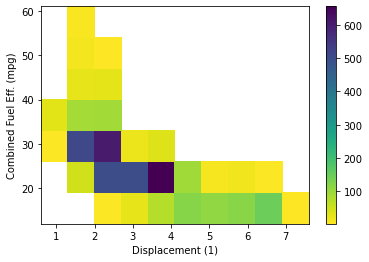

In [52]:
bins_x = np.arange(0.6, 7+0.7, 0.7)
bins_y = np.arange(12, 58+7, 7)

h2d = plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=1, cmap='viridis_r', bins = [bins_x, bins_y]);
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

In [57]:
# (2) array of counts
print(h2d[0])

print("\nShape:", h2d[0].shape)

[[ nan  nan   5.  31.  nan  nan  nan]
 [ nan  49. 515.  89.  25.  14.   9.]
 [  7. 505. 610.  93.  29.   2.  nan]
 [ 25. 504.  22.  nan  nan  nan  nan]
 [ 75. 656.  37.  nan  nan  nan  nan]
 [120.  95.  nan  nan  nan  nan  nan]
 [111.  12.  nan  nan  nan  nan  nan]
 [117.  16.  nan  nan  nan  nan  nan]
 [148.   6.  nan  nan  nan  nan  nan]
 [  2.  nan  nan  nan  nan  nan  nan]]

Shape: (10, 7)


In [55]:
# (3.1) vector of x_bin edges
h2d[1]

array([0.6, 1.3, 2. , 2.7, 3.4, 4.1, 4.8, 5.5, 6.2, 6.9, 7.6])

In [56]:
# (3.2) vector of y_bin edges
h2d[2]

array([12, 19, 26, 33, 40, 47, 54, 61])

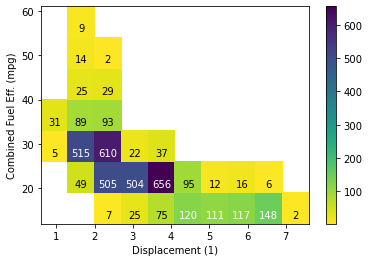

In [67]:
bins_x = np.arange(0.6, 7+0.7, 0.7)
bins_y = np.arange(12, 58+7, 7)

h2d = plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=1, cmap='viridis_r', bins = [bins_x, bins_y]);
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Select the bi-dimensional histogram, a 2D array of samples x and y. 
# Values in x are histogrammed along the first dimension and 
# values in y are histogrammed along the second dimension.
counts = h2d[0]

# Add text annotation on each cell
# Loop through the cell counts and add text annotations for each

for i in range(counts.shape[0]):                                   # loop through rows first.
    for j in range(counts.shape[1]):                               # then, loop through columns.
        c = counts[i,j]                                            # capture the value of the cell (count of a specific cell)
        
        if c >= 100:                                               # increase visibility on darker cells
            plt.text(bins_x[i]+0.35, bins_y[j]+2, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.35, bins_y[j]+2, int(c),
                     ha = 'center', va = 'center', color = 'black')

If you have too many cells in your heat map, then the annotations will end up being too overwhelming, too much to attend to.\
In cases like that, it's best to leave off the annotations and let the data and colorbar speak for themselves.

You're more likely to see annotations in a ***categorical heat map***, where there are going to be fewer cells plotted.\
Indeed, there is a parameter built into seaborn's heatmap() function that is built for categorical heatmaps, as will be seen later.